In [1]:
import os
import pandas as pd
import random
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

# Initialize the OpenAI model
openai_api_key = os.getenv('OPENAI_API_KEY')
openai_model = ChatOpenAI(
    model="gpt-3.5-turbo",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    api_key=openai_api_key)

llm = openai_model

In [2]:
#Load csv into df 
df = pd.read_csv('statementData.csv', encoding='latin1')

#Translated column names 
df.columns = [
    'Account Number', 'Currency', 'BIC', 'Sequence Number', 'Date', 'Interest Date',
    'Amount', 'Balance After Transaction', 'Counterparty Account Number', 'Counterparty Name',
    'Ultimate Party Name', 'Initiating Party Name', 'Counterparty BIC', 'Code', 'Batch ID',
    'Transaction Reference', 'Mandate Reference', 'Creditor ID', 'Payment Reference', 'Description-1',
    'Description-2', 'Description-3', 'Return Reason', 'Original Amount', 'Original Currency', 'Exchange Rate'
]

#Drop unecessary columns 
columns_to_drop = [
    'Account Number', 'Currency', 'BIC', 'Sequence Number', 'Interest Date', 'Balance After Transaction', 'Counterparty Account Number', 'Ultimate Party Name', 'Initiating Party Name', 'Counterparty BIC', 'Code', 'Batch ID',
    'Transaction Reference', 'Mandate Reference', 'Creditor ID', 'Payment Reference', 'Description-1','Description-2', 'Description-3', 'Return Reason', 'Original Amount', 'Original Currency', 'Exchange Rate'
]

df.drop(columns=columns_to_drop, inplace=True)

In [3]:
# Convert Amount column to numerical values
df['Amount'] = df['Amount'].str.replace(',', '.').astype(float)
df['Amount'] = df['Amount'].abs()
categories = ['Salary', 'Groceries', 'Mortgage', 'Eating out', 'Lesiure','Other']
# Function to categorize transactions
def random_category(row):
    return random.choice(categories)

# Add Category column
df['Category'] = df.apply(random_category, axis=1)


# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


In [4]:
df['Month'] = df['Date'].dt.to_period('M')
average_per_category_month = df.groupby(['Category'])['Amount'].mean().reset_index(name='Average Amount')

In [5]:
display(average_per_category_month)

,Category,Average Amount
0,Eating out,452.734054
1,Groceries,274.455000
2,Lesiure,290.427500
3,Mortgage,666.593714
4,Other,446.570185
5,Salary,725.346909


In [6]:
highest_purchase_per_month = df.loc[df.groupby('Month')['Amount'].idxmax()]

In [7]:
# display(highest_purchase_per_month)

,Date,Amount,Counterparty Name,Category,Month
3,2023-12-22,4410.87,Rabobank,Salary,2023-12
37,2024-01-25,5156.88,Zicht Consultants B.V.,Salary,2024-01
62,2024-02-23,3369.91,Rabobank,Mortgage,2024-02
90,2024-03-22,3371.38,Rabobank,Other,2024-03
112,2024-04-24,3562.48,Rabobank,Mortgage,2024-04
191,2024-05-24,5310.01,Rabobank,Salary,2024-05
240,2024-06-03,1557.59,Coöperatieve Rabobank U.,Lesiure,2024-06


In [8]:
display(df)

,Date,Amount,Counterparty Name,Category,Month
0,2023-12-02,1.40,Kosten,Mortgage,2023-12
1,2023-12-02,2.95,Kosten,Salary,2023-12
2,2023-12-12,41.44,VITENS NV,Groceries,2023-12
3,2023-12-22,4410.87,Rabobank,Salary,2023-12
4,2023-12-22,8.64,Interpolis,Mortgage,2023-12
...,...,...,...,...,...
262,2024-06-15,19.00,CCV*FLWRS,Mortgage,2024-06
263,2024-06-15,60.49,Albert Heijn 1376,Groceries,2024-06
264,2024-06-15,4.75,Albait Alsoeri,Salary,2024-06
265,2024-06-16,21.15,ALBERT HEIJN 1376,Salary,2024-06


In [9]:
# trend_df = df.groupby([df['Date'].dt.to_period('M'), 'Category'])['Amount'].sum().unstack().fillna(0)

In [10]:
# display(trend_df)

Category,Eating out,Groceries,Lesiure,Mortgage,Other,Salary
Date,,,,,,
2023-12,1796.59,1730.44,0.00,257.43,5945.06,4413.82
2024-01,500.00,3626.22,1006.78,2478.15,5332.81,9270.23
2024-02,2498.00,1464.15,3169.79,5032.50,2666.80,1750.00
2024-03,385.51,135.00,63.00,5859.35,5682.08,2873.58
2024-04,2372.59,1504.70,1797.38,3830.98,664.35,5052.79
2024-05,9126.87,1893.75,6285.03,5800.40,3566.90,16435.09
2024-06,71.60,75.03,1618.54,71.97,256.79,98.57


In [12]:
salary_per_month = df[df['Category'] == 'Salary'].groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

In [13]:
expenses_per_month = df[df['Category'] != 'Salary'].groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

In [14]:
salary_saving_df = pd.DataFrame({
    'Total Salary': salary_per_month,
    'Total Expenses': expenses_per_month
}).fillna(0)

salary_saving_df['Salary Saving'] = salary_saving_df['Total Salary'] - salary_saving_df['Total Expenses']

In [15]:
display(salary_saving_df)

,Total Salary,Total Expenses,Salary Saving
Date,,,
2023-12,4413.82,9729.52,-5315.70
2024-01,9270.23,12943.96,-3673.73
2024-02,1750.00,14831.24,-13081.24
2024-03,2873.58,12124.94,-9251.36
2024-04,5052.79,10170.00,-5117.21
2024-05,16435.09,26672.95,-10237.86
2024-06,98.57,2093.93,-1995.36


In [11]:
category_spending_per_month = df.pivot_table(index='Category', columns='Month', values='Amount', aggfunc='sum').fillna(0)
category_spending_per_month = category_spending_per_month.merge(average_per_category_month, on='Category', how='left')
category_spending_per_month.rename(columns={'Average Amount': 'Category Average'}, inplace=True)

In [16]:
# display(category_spending_per_month)

,Category,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,Category Average
0,Eating out,1796.59,500.00,2498.00,385.51,2372.59,9126.87,71.60,452.734054
1,Groceries,1730.44,3626.22,1464.15,135.00,1504.70,1893.75,75.03,274.455000
2,Lesiure,0.00,1006.78,3169.79,63.00,1797.38,6285.03,1618.54,290.427500
3,Mortgage,257.43,2478.15,5032.50,5859.35,3830.98,5800.40,71.97,666.593714
4,Other,5945.06,5332.81,2666.80,5682.08,664.35,3566.90,256.79,446.570185
5,Salary,4413.82,9270.23,1750.00,2873.58,5052.79,16435.09,98.57,725.346909


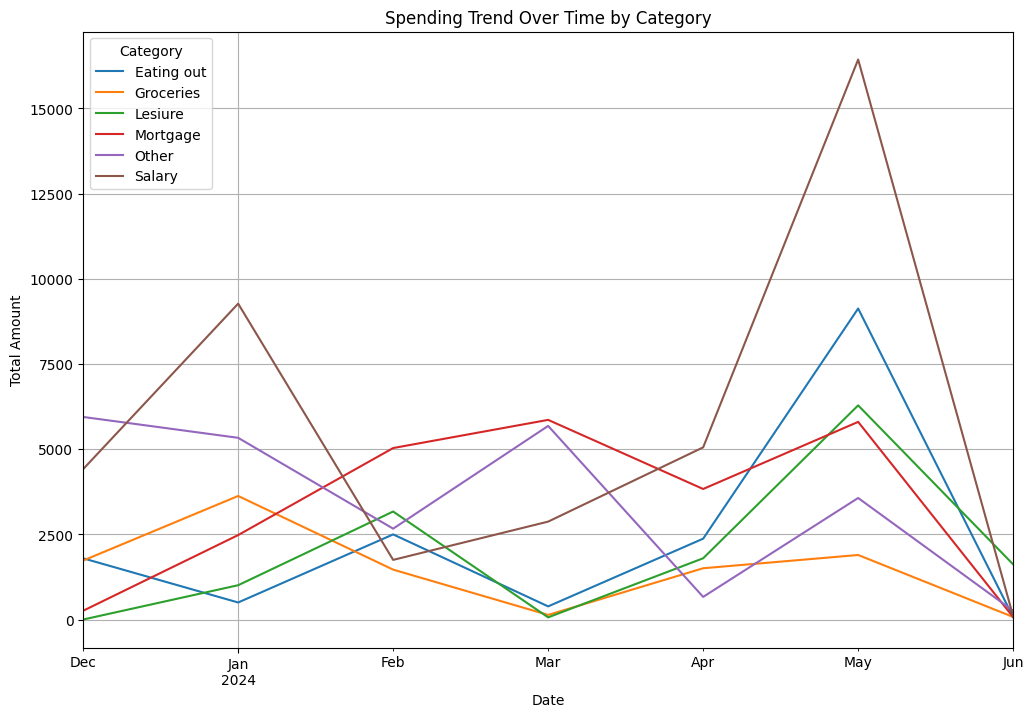

In [17]:
# Plot the trend over time for each category
trend_df.plot(kind='line', figsize=(12, 8))
plt.title('Spending Trend Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend(title='Category')
plt.grid(True)
plt.show()

In [18]:
ragDict = {
    'Monthly Category Spend' : category_spending_per_month,
    'Highest Purchase Per Month': highest_purchase_per_month,
    'Savings Over Months' : salary_saving_df
}

In [19]:
messages = [
    ("system", f'''
    You are a Financial advisor. Please help the user make good financial decisions.
    If you are unsure what the user is asking for exactly, please ask them to clarify. If you get given a context, which is a dictionary of dataframes,
    You need to analyze each dataframe and reflect your thinking process, normally you should follow 3 steps
     Step 1: Analyze the monthly category spend dataframe. In this dataframe you will find the average spending per category and how much the user has spent per month. You should compare the monthly spending with the average.
     If the spending is around 10% higher than average then you should point it out and give your advice.
     Step 2: Analyze the highest purchase per month dataframe. In this dataframe you will find the highest purchase the user did per month. Make them aware of it. 
     Step 3: Analyze the Savings Over Months dataframe. In this dataframe you will see how much money the user was able to save for the each month. They should be able to save at least 10% of their salary. If they do not meet this criteria. Give them advice on how achieve that goal
    '''),
    (f'''Can you give me some advice on how I can save money in the future?
     Context: 
     {ragDict}
     '''),
]
llm.invoke(messages).content

'To help you save money in the future, let\'s analyze the data provided:\n\nStep 1: Monthly Category Spend Analysis:\n- In the "Monthly Category Spend" dataframe, we can see that your spending in some categories is significantly higher than the average spending per category. For example:\n  - Eating out in 2023-12 is 297% higher than the average.\n  - Groceries in 2024-01 is 1226% higher than the average.\n  - Lesiure in 2024-02 is 987% higher than the average.\n  - Mortgage in 2024-03 is 406% higher than the average.\n  - Other in 2024-04 is 700% higher than the average.\n\nAdvice: To save money, consider reducing expenses in these categories by budgeting, meal planning, and finding cheaper alternatives.\n\nStep 2: Highest Purchase Per Month Awareness:\n- Be aware of your highest purchases per month, such as:\n  - Salary payment to Rabobank in 2023-12: 4410.87\n  - Salary payment to Zicht Consultants B.V. in 2024-01: 5156.88\n  - Mortgage payment to Rabobank in 2024-02: 3369.91\n  - O